# Exploratory Data Analysis

Now that we've completed all the steps to collect and clean our data. Let's get a first exploratory look at it.

How is it distributed? 

Are there any correlations? 

These are some questions were looking to answer here.

Here's an overview of the dataset, the non numeric columns have already been hot encoded for our modelling.

### Data Dictionary
- address: unique token addresse
- created: day when token was created
- verified: is the token verified
- renounced: has the contract been renounced by the developer
- marketcap: marketcap of token at time of liquidity lock
- buys: number of buys up to liquidity lock
- sells: number of sells up to liquidity lock
- buysell_rating: 3 level rating provided on the ratio of buys to sells
- honeypot: is the token safe to buy? (not honeypot scam)
- buytax: token tax on buy transactions
- selltax: token tax on sell transactions
- taxrating: 3 level rating given on tax level
- liquidity: amount of liquidity at time of liquidity lock
- owner: where does the project owner have their tokens
- owner_rating: 3 level rating of owner token holdings
- deployer_balance: amount ethereum in the wallet that deployed the token contract
- deployer_tx: number of transactions made by the wallet that deployed the token contract
- funding_source: source of deployer wallets funding
- funding_source_rating: 3 level rating for the funding source
- funding_amount: amount which deployer wallet was funded
- max_wallet: limit set on token for the maximum percentage of token supply allowed in a single buyers wallet
- max_tx: limit set on token for the maximum volume allowed to make in one trade
- ath_date: the date where the token saw its highest price (within 98 percentile to avoide abnormalities and spikes)
- ath_price: the highest price of the token up until the data was collected => Dec, 31st, 2023
- name: name of the token
- symbol: token symbol, shorthand name or 'ticker'
- totalSupply: the total number of tokens for the project ('shares')
- alert_timestamp: day when trading liquidity locked
- ath_marketcap: the tokens total marketcap at it's all time high
- growth: multiple growth in marketcap from liquidity lock to all time high as of data collection
- suitable investment: target variable

In [2]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/complete_df.csv')

#initial look at counts, data types, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59572 entries, 0 to 59571
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   address                       59572 non-null  object 
 1   created                       59572 non-null  object 
 2   verified                      59572 non-null  bool   
 3   renounced                     59572 non-null  object 
 4   marketcap                     59572 non-null  int64  
 5   buys                          59572 non-null  int64  
 6   sells                         59572 non-null  int64  
 7   buysell_rating                59572 non-null  object 
 8   honeypot                      59572 non-null  bool   
 9   buytax                        59572 non-null  float64
 10  selltax                       59572 non-null  float64
 11  taxrating                     59572 non-null  object 
 12  liquidity                     59572 non-null  int64  
 13  o

In [3]:
df.head()

,address,created,verified,renounced,marketcap,buys,sells,buysell_rating,honeypot,buytax,...,owner_rating_green,owner_rating_red,owner_rating_yellow,funding_source_rating_green,funding_source_rating_red,funding_source_rating_yellow,alert_timestamp,ath_marketcap,growth,suitable_investment
0,0xa190700f5ae95de4eabf29fa9469bd85ff5a7919,2022-11-04,True,Not Ownable,9755,100,24,green,True,5.0,...,True,False,False,False,False,True,2022-11-04,1.033986e+04,1.059955,0
1,0x9de736b02f3d09738ac42cdea046b014b0d54d60,2022-11-04,True,False,21924,90,19,green,True,3.0,...,True,False,False,True,False,False,2022-11-04,3.988568e+04,1.819270,0
2,0xaaf8a1aad53c9384be3aecb5a16af6121a5ad935,2022-11-04,True,Not Ownable,8951,27,7,yellow,True,0.0,...,True,False,False,False,False,True,2022-11-04,2.713441e+07,3031.439308,0
3,0xa17ae9a7174cdbc5294e3fad8afbafc1be1764a3,2022-11-04,True,False,25578,75,8,yellow,True,5.0,...,True,False,False,False,False,True,2022-11-04,9.067366e+04,3.544986,0
4,0x3b2d93677c433c191aa379c78b97e0685c3f4798,2022-11-04,False,False,44448,16,10,yellow,True,6.8,...,True,False,False,False,False,True,2022-11-04,6.342732e+04,1.427000,0


Let's compare the distribution of our target class to the rest of the data:

In [4]:
df['suitable_investment'].sum() / len(df)

0.01116296246558786

1.1% of our data is considered a 'suitable investment'. This is greatly imbalanced and something we will have to account for in our machine learning modelling.

In [5]:
target_df = df[df['suitable_investment'] == 1]

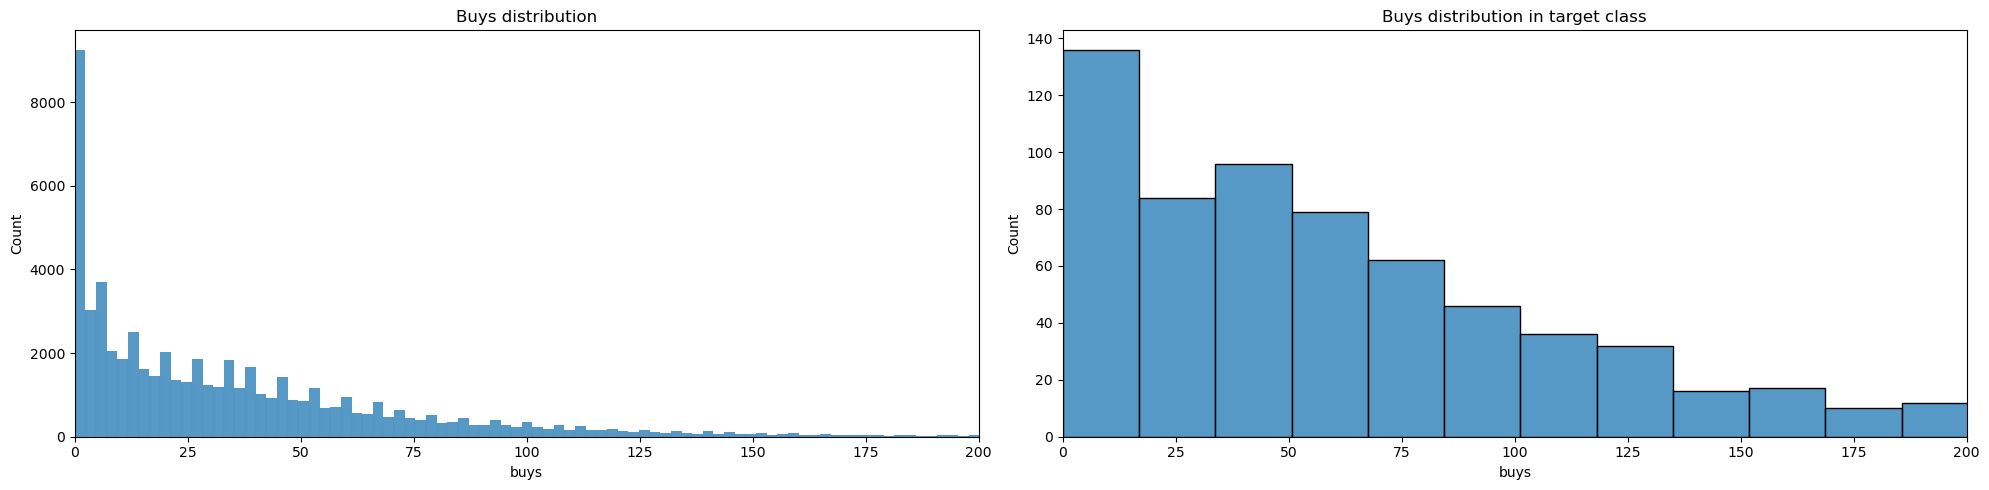

In [11]:
plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['buys'])
plt.xlim(0,200)
plt.title('Buys distribution')

plt.subplot(1, 2, 2)
sns.histplot(target_df['buys'])
plt.xlim(0,200)
plt.title('Buys distribution in target class')

plt.tight_layout()
plt.show()

We see that in the target class, there is far less of the proprtional data around 0 buys. 

This makes sense, a token with 0 buys is unlilkely to be trusted.

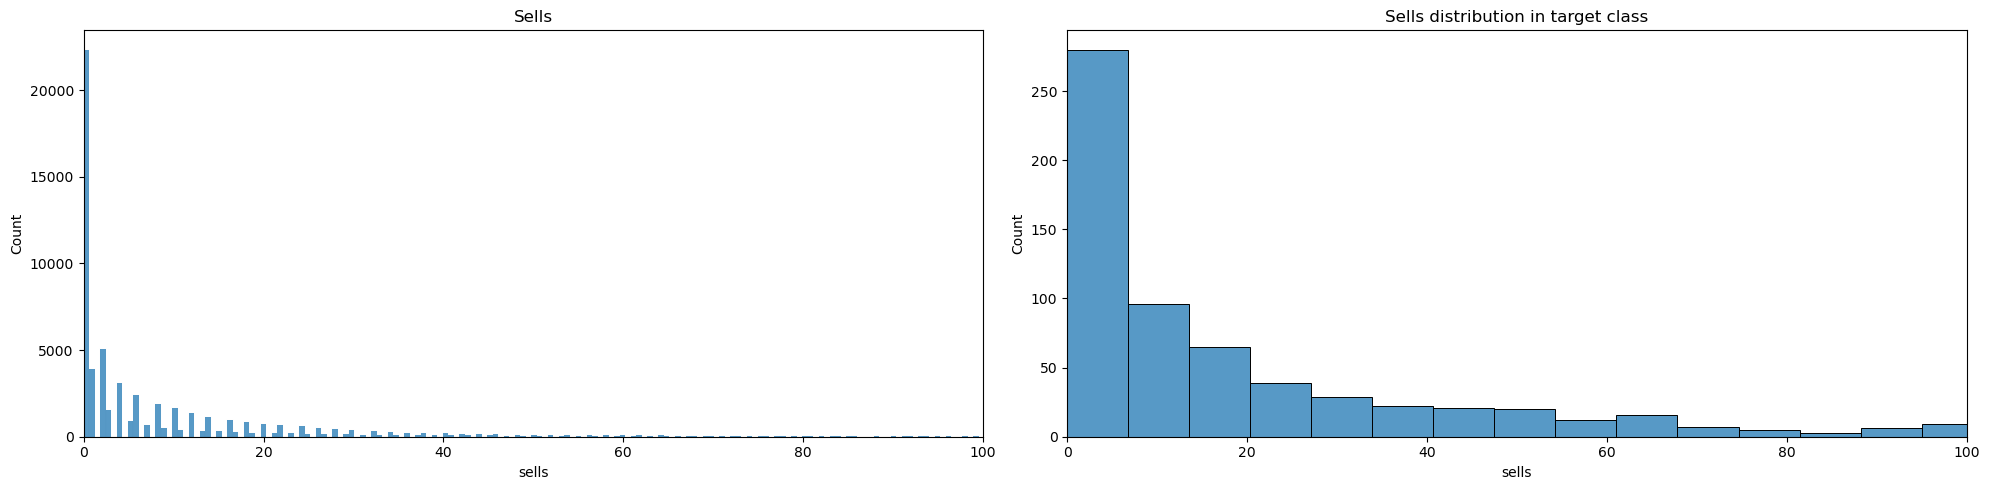

In [13]:
plt.subplots(1, 2, figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['sells'])
plt.xlim(0,100)
plt.title('Sells')

plt.subplot(1, 2, 2)
sns.histplot(target_df['sells'])
plt.xlim(0,100)
plt.title('Sells distribution in target class')

plt.tight_layout()
plt.show()

Similar as with the buys, a smaller proportion of the target class has near 0 sells. 

0 Sells is a potential indicator of a honeypot scam, where investors can buy tokens, but they cannot sell the tokens. 

In [9]:
print(df['marketcap'].mean())
print(target_df['marketcap'].mean())

30821461.06724636
47500.14586466165


Target class has a lower marketcap on average, however this number for the non target class is likely inflated by scam tokens starting off with an unrealilstically large marketcap to create a false sense of security.

In [14]:
print(df['liquidity'].mean())
print(target_df['liquidity'].mean())

12604.062630094675
18204.467669172933


Liquidity is 50% higher on average in our target class

In [16]:
print(df['funding_source_rating'].value_counts())
print(target_df['funding_source_rating'].value_counts())

funding_source_rating
green     31339
yellow    15743
red        8888
Name: count, dtype: int64
funding_source_rating
green     276
yellow    203
red       171
Name: count, dtype: int64


There's actually a greater percentage of green funding source rating in the non target class.
- 42% distribution of green rating in our target class
- 55% in our overall data

In [17]:
print(df['owner_rating'].value_counts())
print(target_df['owner_rating'].value_counts())

owner_rating
green     37507
yellow    15269
red        6796
Name: count, dtype: int64
owner_rating
green     458
yellow    155
red        52
Name: count, dtype: int64


There's actually a greater percentage of green owner rating in the non target class.
- 47% green in target and 
- 63% green in overall data

In [10]:
print(df['max_wallet'].value_counts())

max_wallet
100.0    29684
2.0      19995
3.0       2788
1.0       2491
2.5       1495
4.0        969
1.5        914
3.5        467
0.5        424
4.5        159
5.0         75
0.0         64
10.0        15
40.0         6
50.0         5
20.0         5
6.0          3
30.0         3
13.0         2
8.0          2
29.0         1
15.0         1
9.0          1
99.0         1
25.0         1
75.0         1
Name: count, dtype: int64


After no limit on wallet maximum, the most popular limit is 2%

Let's take a look at the overall correlation in our data:

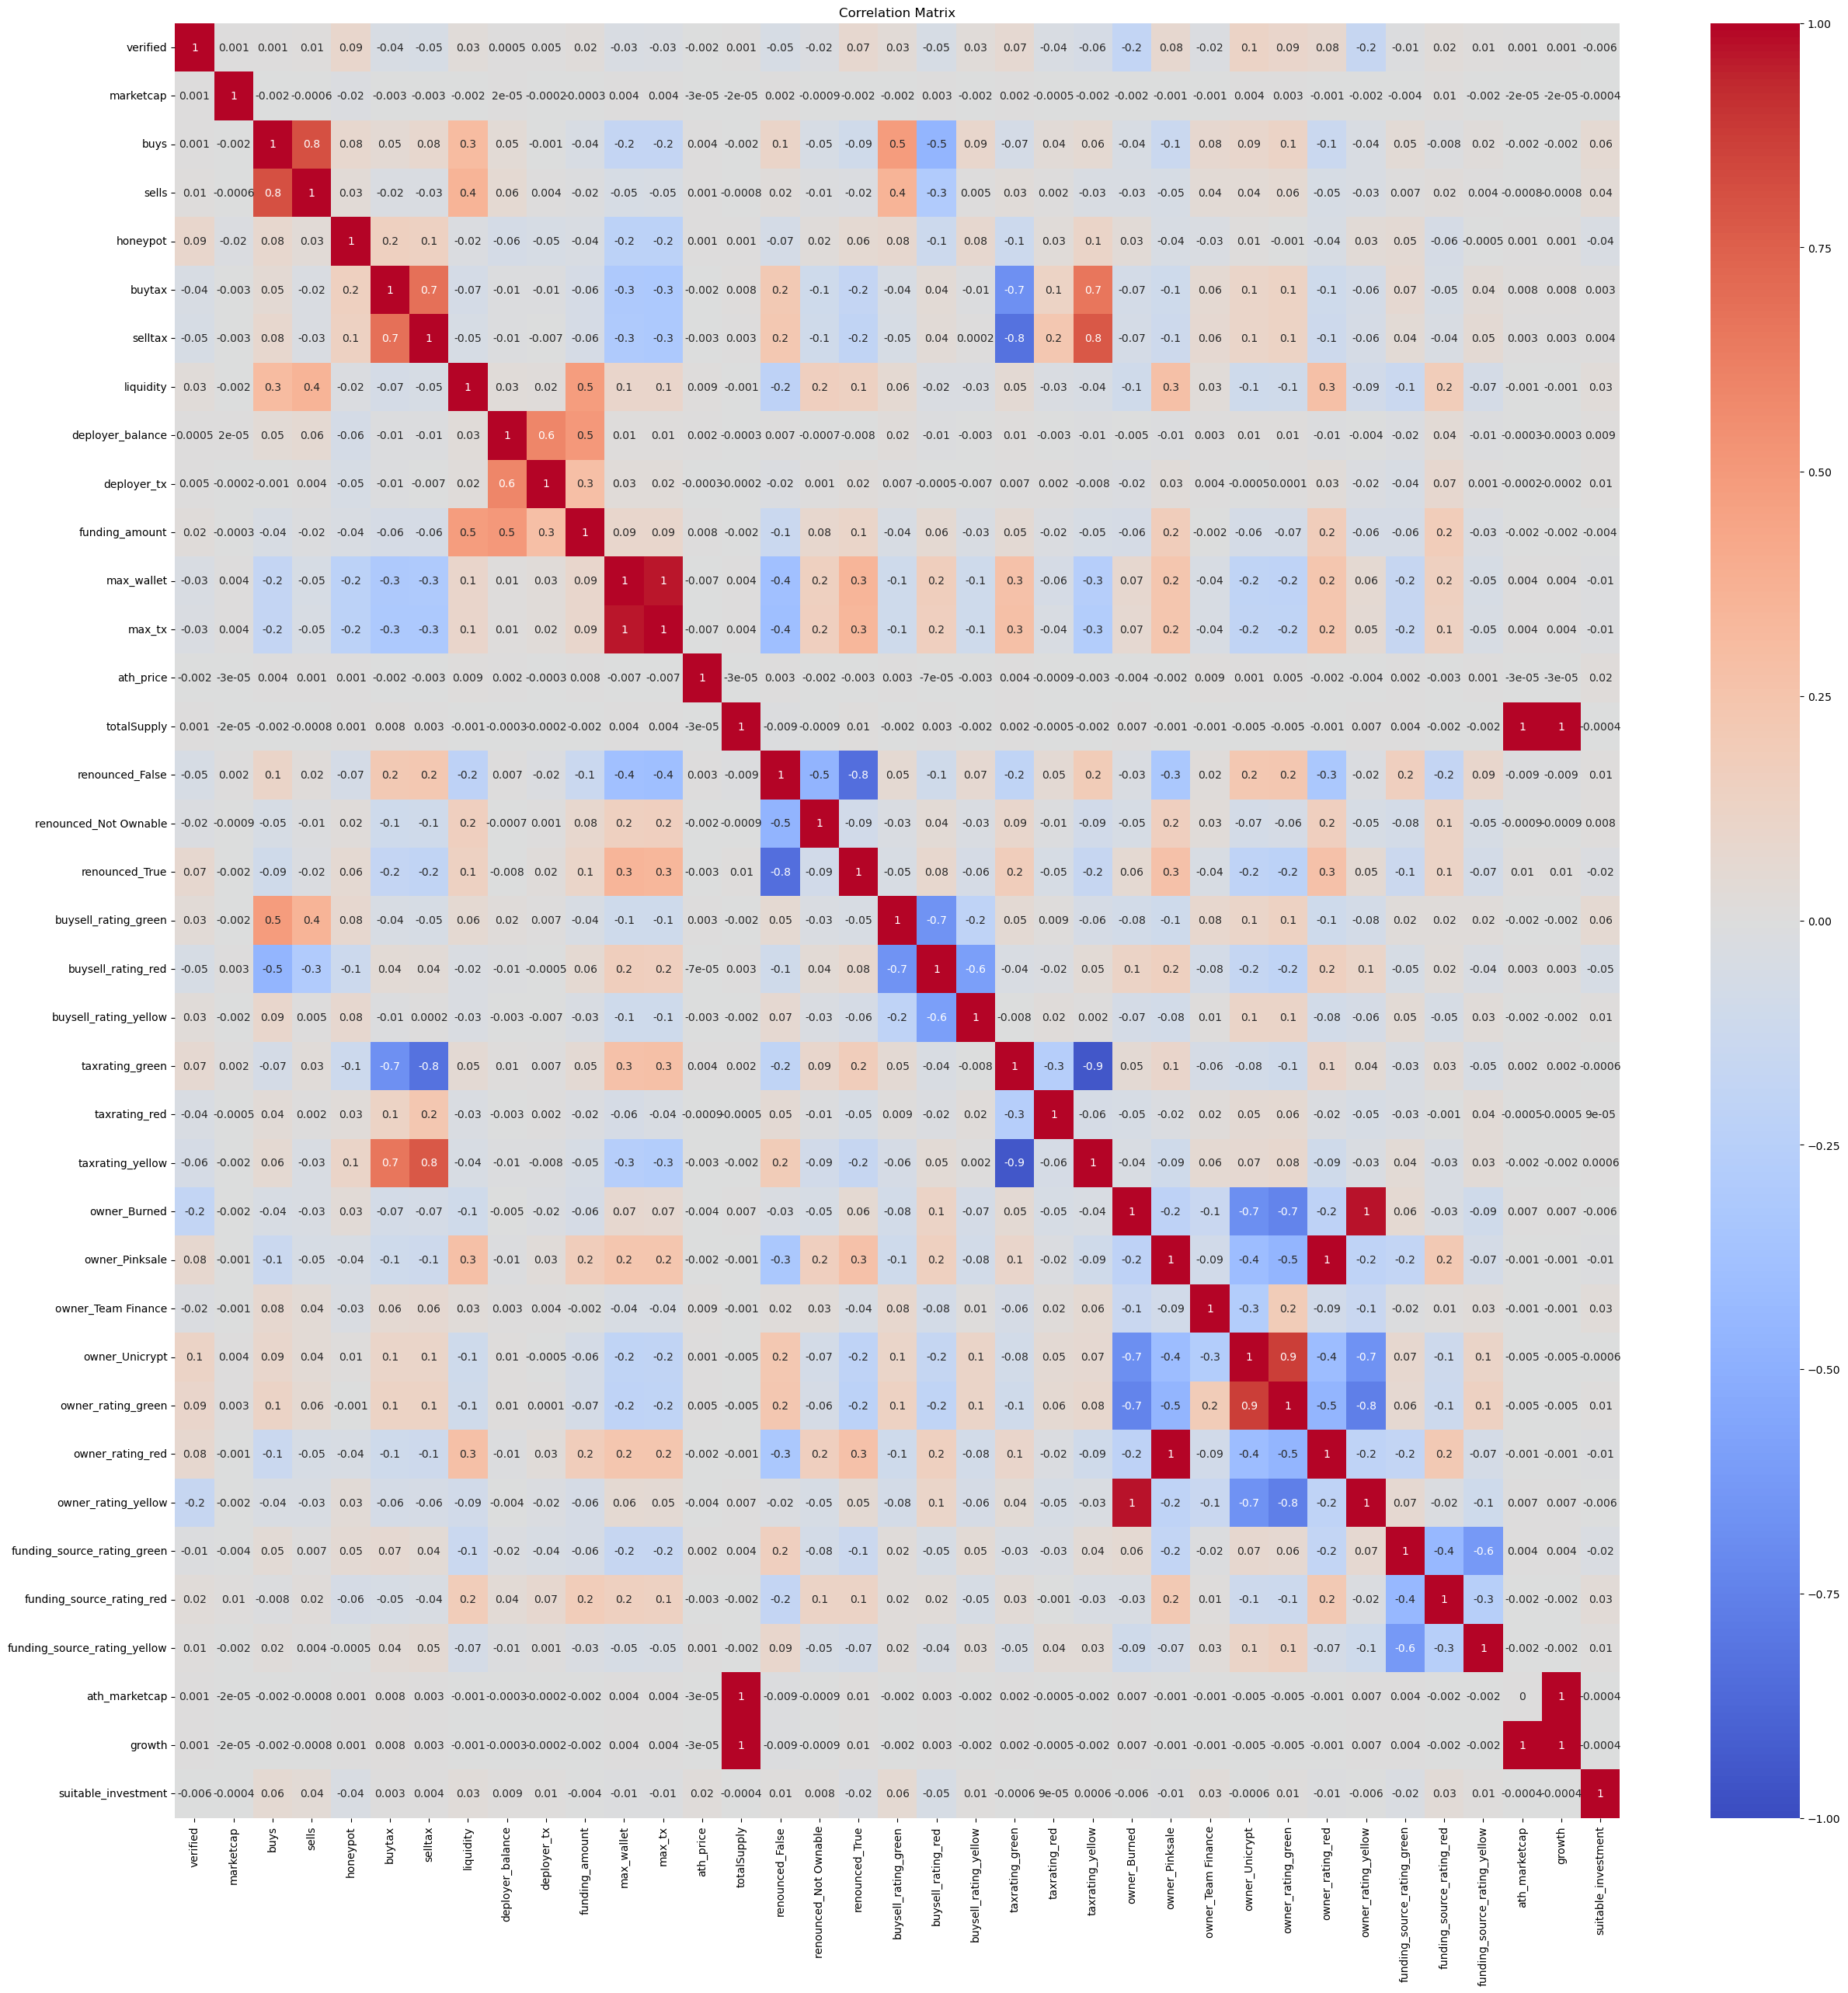

In [4]:
plt.figure(figsize=(30,30))

# we only look at numeric value types for correlation
corr = df.corr(numeric_only=True)
heatmap = sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.1g', vmax=1.0, vmin=-1.0,)
plt.title('Correlation Matrix')
plt.show()

We do not see any strong correlation with our target class. 

We will be looking for minute nuances and patterns within our data to create a profitable strategy, meaning are machine learning model will need to be fairly complex to capture the trend.

--------------------------------------------------------------------------------------------------------------------------------------------------------

We will now move onto our base modelling to see if we can capture any hint of a trend

That process can be seen here:**['base_modelling'](../Models/base_modelling.ipynb)**